In [42]:
#import libaries
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import os

            x           y
0    0.000000   -7.529438
1    0.202020   19.420204
2    0.404040   -6.883702
3    0.606061  -12.066538
4    0.808081    7.476989
..        ...         ...
95  19.191919  112.300179
96  19.393939   99.755355
97  19.595960  106.146517
98  19.797980   97.225922
99  20.000000  120.013017

[100 rows x 2 columns]


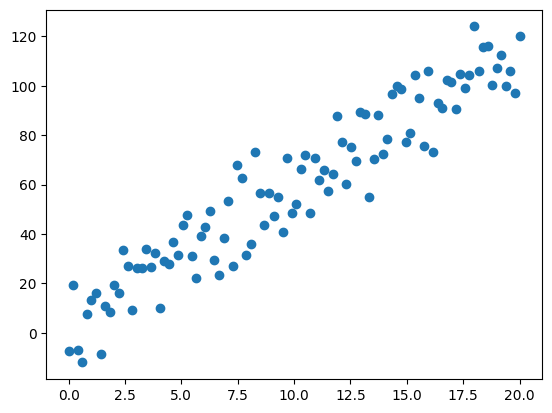

In [43]:
#get data
data = pd.read_csv('linear_data.csv')
print(data)

#basic display
plt.scatter(data.x, data.y)
plt.show()
plt.close()

In [44]:
def loss_function(m, b, points):
    # initialise var
    total_error =0
    n = len(points)
    #for all points
    for i in range(n):
        x = points.iloc[i].x
        y = points.iloc[i].y

        #error functiop - sum of mean squared
        total_error+= (y - (m * x + b)) ** 2
    residual_error = total_error/float(n)
    return residual_error

In [45]:
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient =0

    n = len(points)

    for i in range(n):
        x = points.iloc[i].x
        y = points.iloc[i].y

        #loss function after differenciation
        m_gradient+= -(2/n) * x * (y - (m_now * x +b_now))
        b_gradient+= -(2/n)  * (y - (m_now * x +b_now))

    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

C:\Users\aakas\AppData\Local\Temp\ipykernel_21276\2533781975.py:12: RuntimeWarning: overflow encountered in scalar multiply
  m_gradient+= -(2/n) * x * (y - (m_now * x +b_now))
C:\Users\aakas\AppData\Local\Temp\ipykernel_21276\2533781975.py:13: RuntimeWarning: overflow encountered in scalar multiply
  b_gradient+= -(2/n)  * (y - (m_now * x +b_now))
C:\Users\aakas\AppData\Local\Temp\ipykernel_21276\2533781975.py:12: RuntimeWarning: invalid value encountered in scalar multiply
  m_gradient+= -(2/n) * x * (y - (m_now * x +b_now))
C:\Users\aakas\AppData\Local\Temp\ipykernel_21276\2533781975.py:13: RuntimeWarning: invalid value encountered in scalar multiply
  b_gradient+= -(2/n)  * (y - (m_now * x +b_now))


nan nan


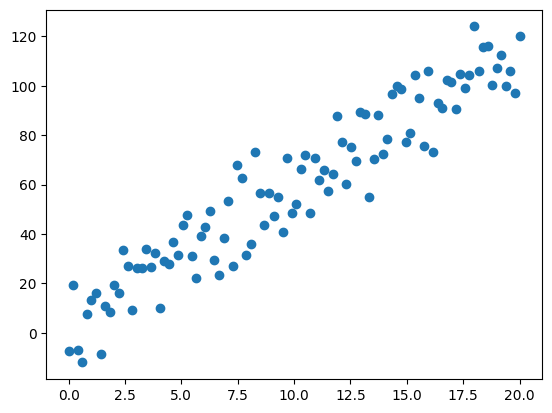

In [ ]:
# main code
m, b = 0, 0
L = 0.9
epochs = 500

# for making GIF
frames_dir = "frames-basic"
os.makedirs(frames_dir, exist_ok=True)

for i in range(epochs):
    m, b = gradient_descent(m, b, data, L)
    #save image every 10 iterations
    if i % 10 == 0 or i == epochs - 1:
        plt.figure()
        plt.scatter(data.x, data.y, color='blue', label='Data')
        # line eqn
        y_pred = m * data.x + b
        #new line
        plt.plot(data.x, y_pred, color='red', label=f'Line: y={m:.2f}x+{b:.2f}')
        plt.title(f'Epoch {i}')
        plt.legend()
        plt.xlim(0, 20)
        plt.ylim(min(data.y), max(data.y)+5)
        plt.savefig(f"{frames_dir}/frame_{i:04d}.png")
        plt.close()

print(m, b)

plt.scatter(data.x, data.y)
plt.plot(list(range(0, 20)), [m * x + b for x in range(0, 20)], color='green')
plt.show()
plt.close()

In [47]:
#make GIF
images = []
for filename in sorted(os.listdir(frames_dir)):
    if filename.endswith('.png'):
        images.append(imageio.imread(os.path.join(frames_dir, filename)))

imageio.mimsave('gradient_descent_basic.gif', images, duration=0.1)

print("GIF saved as 'gradient_descent_basic.gif'")

C:\Users\aakas\AppData\Local\Temp\ipykernel_21276\3565822340.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(os.path.join(frames_dir, filename)))


GIF saved as 'gradient_descent_basic.gif'
